In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.svm import SVR

In [6]:
df=pd.read_csv(r"C:\Users\Asus\Desktop\IIIT NR\2nd Sem\AIML Files\final project\ETH_Dataset.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
print(df)

                                 Date    Open    High     Low   Close
2020-04-16 00:00:00  16-04-2020 00:00  152.94  152.94  150.39  150.39
2020-04-15 23:00:00  15-04-2020 23:00  155.81  155.81  151.39  152.94
2020-04-15 22:00:00  15-04-2020 22:00  157.18  157.30  155.32  155.81
2020-04-15 21:00:00  15-04-2020 21:00  158.04  158.31  157.16  157.18
2020-04-15 20:00:00  15-04-2020 20:00  157.10  158.10  156.87  158.04
...                               ...     ...     ...     ...     ...
2016-09-05 17:00:00  09-05-2016 17:00    9.83    9.83    9.48    9.49
2016-09-05 16:00:00  09-05-2016 16:00    9.99    9.99    9.79    9.83
2016-09-05 15:00:00  09-05-2016 15:00   10.00   10.00    9.99    9.99
2016-09-05 14:00:00  09-05-2016 14:00    9.55   10.00    9.55   10.00
2016-09-05 13:00:00  09-05-2016 13:00    0.00   12.00    0.00    9.55

[34497 rows x 5 columns]


In [7]:
future_days=5

In [8]:
df[str(future_days)+'_Day_Price_Forecaast']=df[['Close']].shift(-future_days)
df[['Close',str(future_days)+'_Day_Price_Forecaast']]

,Close,5_Day_Price_Forecaast
2020-04-16 00:00:00,150.39,157.10
2020-04-15 23:00:00,152.94,157.78
2020-04-15 22:00:00,155.81,157.48
2020-04-15 21:00:00,157.18,157.12
2020-04-15 20:00:00,158.04,155.81
...,...,...
2016-09-05 17:00:00,9.49,NaN
2016-09-05 16:00:00,9.83,NaN
2016-09-05 15:00:00,9.99,NaN
2016-09-05 14:00:00,10.00,NaN


In [9]:
X=np.array(df[['Close']])
X=X[:df.shape[0]-future_days]
print(X)

[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.97]
 [  9.99]
 [  9.36]]


In [10]:
y=np.array(df[str(future_days)+'_Day_Price_Forecaast'])
y=y[:-future_days]
print(y)

[157.1  157.78 157.48 ...   9.99  10.     9.55]


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [14]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [15]:
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)

svr_rbf accuracy: 99.82142847942205


In [18]:
svm_prediction=svr_rbf.predict(x_test)
print(svm_prediction)

[195.24533115  10.81633991 229.86094845 ... 263.26689234 261.5491114
 483.90389462]


In [17]:
print(y_test)

[194.68  11.29 234.42 ... 268.09 262.87 466.5 ]


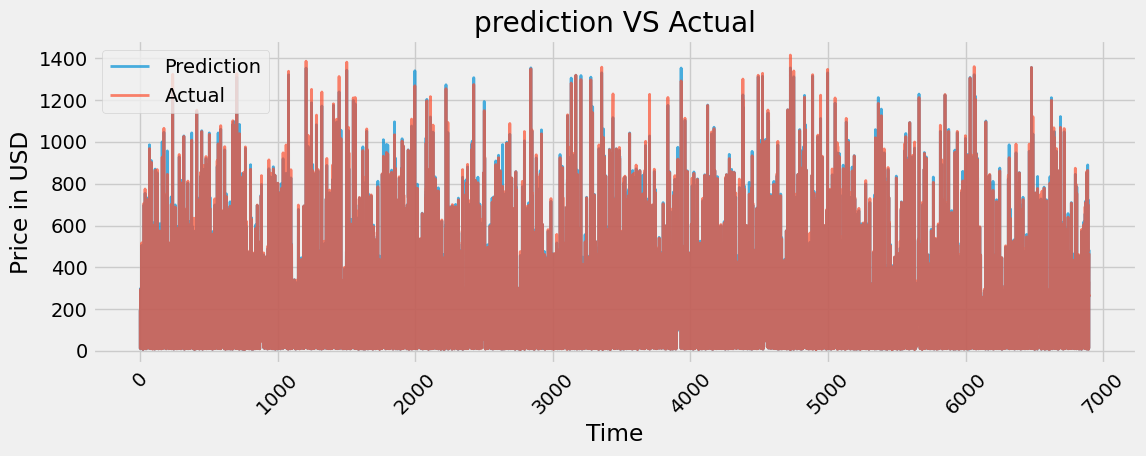

In [19]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction,label='Prediction',lw=2,alpha=.7)
plt.plot(y_test,label='Actual',lw=2,alpha=.7)
plt.title('prediction VS Actual')
plt.ylabel("Price in USD")
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [20]:
from prettytable import PrettyTable  
  
columns = ["Predicted", "Original"]  
  
newTable = PrettyTable()  
  
# Add Columns  
newTable.add_column(columns[0],svm_prediction ) 
newTable.add_column(columns[1], y_test)  
# newTable.add_column(columns[2],X)
  
print(newTable)   

+--------------------+----------+
|     Predicted      | Original |
+--------------------+----------+
| 195.24533115068516 |  194.68  |
| 10.816339914878881 |  11.29   |
| 229.86094844717297 |  234.42  |
|  81.9610229419485  |  83.33   |
|  299.478190994899  |  295.6   |
| 177.4070932278031  |  178.22  |
| 126.78623112932041 |  125.0   |
| 171.30787700578844 |  171.78  |
| 166.57599578266672 |  164.23  |
| 135.27417404563352 |  135.25  |
| 323.1058330950999  |  327.07  |
| 182.11864824704048 |  180.78  |
| 505.2148222472696  |  517.31  |
| 13.646827347172461 |   13.7   |
| 305.3400147801319  |  306.18  |
| 217.42906554927265 |  222.83  |
| 158.03967287978298 |  157.31  |
| 152.26787246602584 |  152.15  |
| 179.4035204212396  |  181.53  |
| 331.1157768860205  |  331.33  |
| 130.22598022276276 |  127.21  |
| 6.412349710282342  |   6.81   |
| 181.96891708604278 |  183.16  |
| 190.6733609072167  |  192.03  |
| 12.05816049795726  |  11.72   |
| 131.33572519776948 |  127.79  |
| 174.25270275